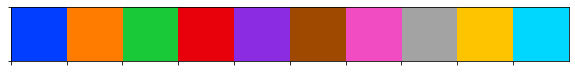

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
data2 = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data2 = data2.drop(["note_it", "note_en", "stato", "codice_regione", "lat", "long"], axis=1)
conf_vs_deaths_vs_healed = pd.DataFrame(columns = data2.columns.to_list())
for date, subdf in data2.groupby('data'):
    subdf = subdf.drop(["data", "denominazione_regione"], axis=1)
    subdf.loc[date]= subdf.sum(numeric_only=True, axis=0)
    conf_vs_deaths_vs_healed = conf_vs_deaths_vs_healed.append(subdf.iloc[-1:])

conf_vs_deaths_vs_healed = conf_vs_deaths_vs_healed.drop(["data", "denominazione_regione"], axis=1)

print("Numbers today\n",conf_vs_deaths_vs_healed.tail(1))
print("\n\nVariatons today\n",(conf_vs_deaths_vs_healed - conf_vs_deaths_vs_healed.shift(1))
      .drop(["tamponi","variazione_totale_positivi"], axis=1)
      .tail(1))


Numbers today
                      ricoverati_con_sintomi  terapia_intensiva  \
2020-04-24T17:00:00                 22068.0             2173.0   

                     totale_ospedalizzati  isolamento_domiciliare  \
2020-04-24T17:00:00               24241.0                 82286.0   

                     totale_positivi  variazione_totale_positivi  \
2020-04-24T17:00:00         106527.0                      -321.0   

                     nuovi_positivi  dimessi_guariti  deceduti  totale_casi  \
2020-04-24T17:00:00          3021.0          60498.0   25969.0     192994.0   

                       tamponi  casi_testati  
2020-04-24T17:00:00  1642356.0     1147850.0  


Variatons today
                      ricoverati_con_sintomi  terapia_intensiva  \
2020-04-24T17:00:00                  -803.0              -94.0   

                     totale_ospedalizzati  isolamento_domiciliare  \
2020-04-24T17:00:00                -897.0                   576.0   

                     totale_posi

Text(0, 0.5, 'Totals')

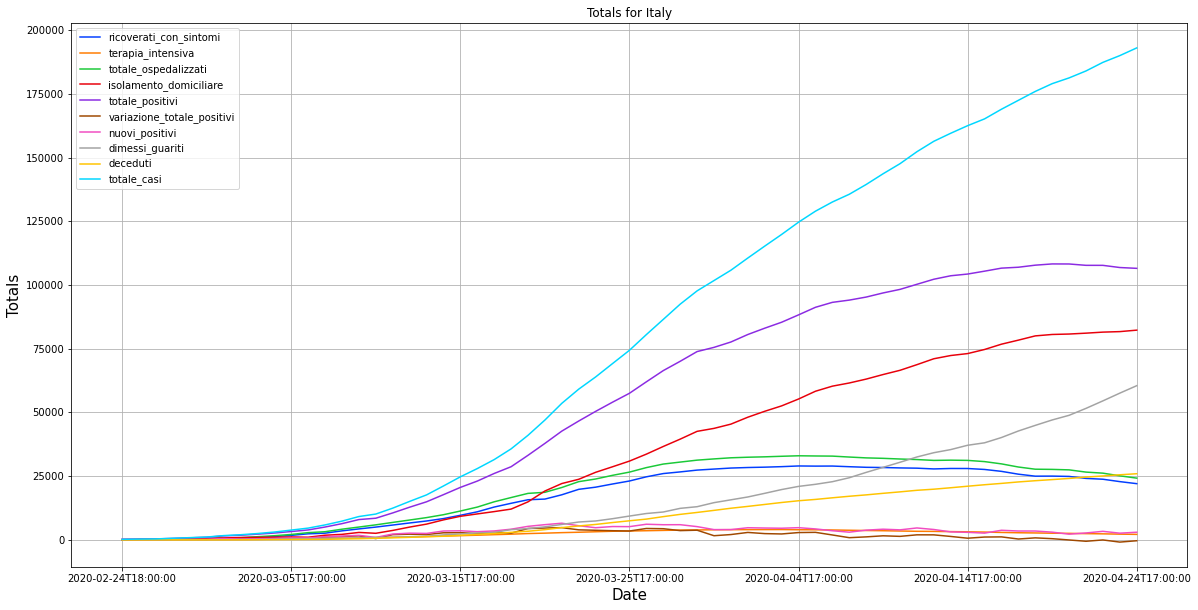

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=1)
conf_vs_deaths_vs_healed.drop(["tamponi","casi_testati"], axis=1).plot(
    grid=True, ax=axes, title="Totals for Italy", figsize = (20,10))
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Totals", fontsize=15)

Text(0, 0.5, 'Totals')

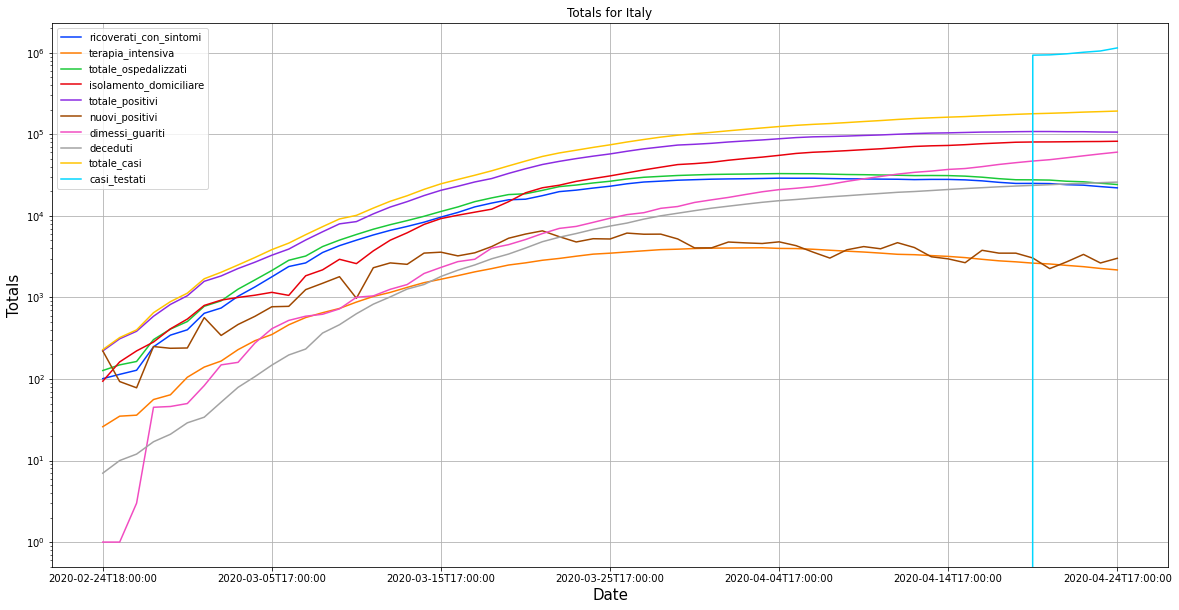

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1)
conf_vs_deaths_vs_healed.drop(["variazione_totale_positivi","tamponi"], axis=1).plot(
    grid=True, ax=axes, title="Totals for Italy", figsize = (20,10), logy=True)
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Totals", fontsize=15)

Text(0, 0.5, 'Daily')

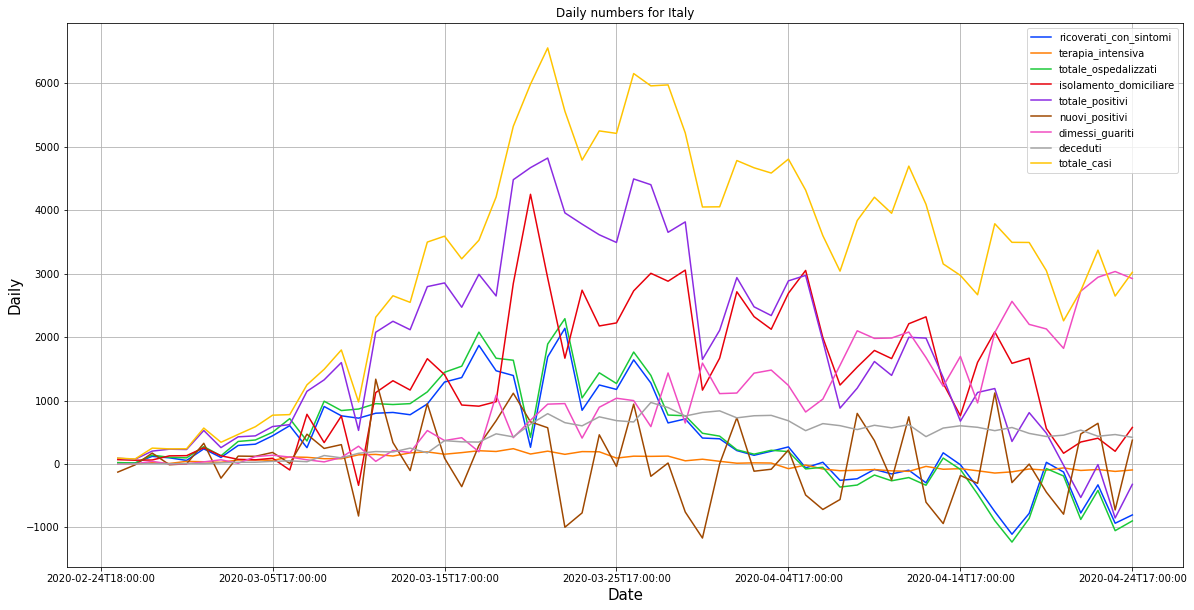

In [5]:
conf_vs_deaths_vs_healed_daily = conf_vs_deaths_vs_healed - conf_vs_deaths_vs_healed.shift(1)

fig, axes = plt.subplots(nrows=1, ncols=1)

conf_vs_deaths_vs_healed_daily.drop(["tamponi","casi_testati","variazione_totale_positivi"], axis=1).plot(
    grid=True, ax=axes, title="Daily numbers for Italy", figsize = (20,10))
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Daily", fontsize=15)

(0.0, 200000.0)

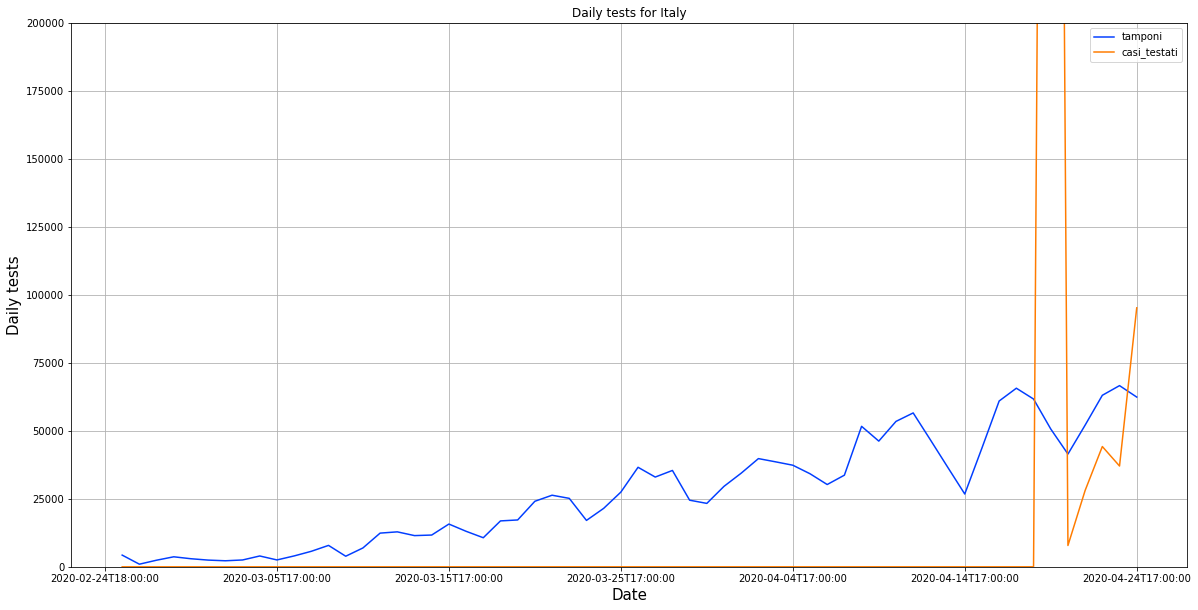

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1)

conf_vs_deaths_vs_healed_daily[["tamponi","casi_testati"]].plot(
    grid=True, ax=axes, title="Daily tests for Italy", figsize = (20,10))
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Daily tests", fontsize=15)
axes.set_ylim(0,200000)

Text(0, 0.5, 'Fraction of positive per test')

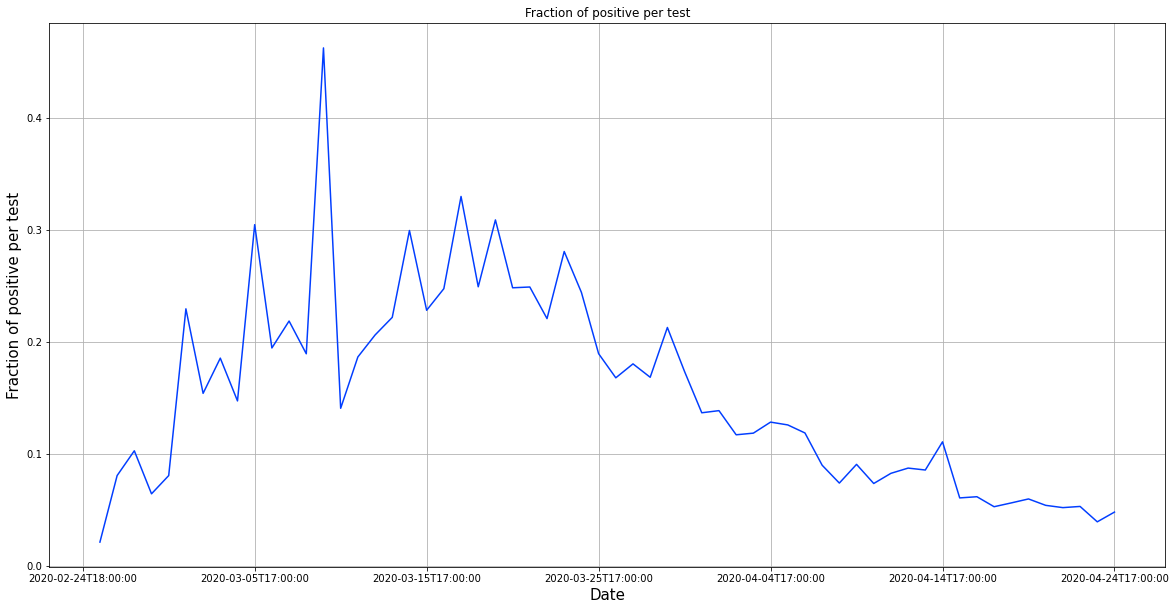

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1)

positive_per_test = conf_vs_deaths_vs_healed["nuovi_positivi"].divide(conf_vs_deaths_vs_healed_daily["tamponi"].replace(0, 1))

positive_per_test.plot(
    grid=True, ax=axes, title="Fraction of positive per test", figsize = (20,10))
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Fraction of positive per test", fontsize=15)